In [125]:
import pandas as pd
import numpy as np

from scipy.spatial.distance import pdist,squareform
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [126]:
df = pd.read_csv('Data/emision-co2-autos.csv', encoding="cp1252")

In [127]:
df.head(5)

,vehiculo_marca,vehiculo_modelo,vehiculo_tipo,vehiculo_traccion,vehiculo_id_motor,vehiculo_cilindrada,vehiculo_potencia,vehiculo_tipo_transmision,vehiculo_tipo_combustible,vehiculo_standard_emision,lca_numero,fecha_firma,ensayo_gei_numero,ensayo_gei_laboratorio,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto,id_etiqueta
0,TOYOTA,LAND CRUISER 200,SUV,4x4,TOYOTA 1VD-FTV,4461.0,NaN,AUTOMÁTICA,GAS OIL,EURO V,NaN,04/10/2017,H1860666086/241,VINÇOTTE nv,260.70,11.56,8.94,9.90,000001A
1,RENAULT,FLUENCE 2.0 16V,SEDÁN 4 PUERTAS,4x2,RENAULT M4RK7,1997.0,NaN,CVT,NAFTA,EURO V,NaN,22/06/2016,09/09790,UTAC,175.40,10.50,6.10,7.70,000178A
2,RENAULT,DUSTER 2.0 16v,SEDÁN 5 PUERTAS,4x2,RENAULT F4R E4,1998.0,105,MANUAL,NAFTA,EURO V,NaN,NaN,R1-0210/17,DELPHI,198.86,11.13,6.98,8.52,000650C
3,RENAULT,DUSTER 2.0 16v 4X4,SEDÁN 5 PUERTAS,4X4,RENAULT F4R E4,1998.0,105,MANUAL,NAFTA,EURO V,NaN,NaN,R1-0209/17,DELPHI,199.74,11.20,7.01,8.55,000659C
4,CITROËN,DS4,COUPÉ 3 + 2 PUERTAS,4x2,CITROËN EP6CDTM (5FM),1598.0,NaN,AUTOMÁTICA,NAFTA,EURO V,NaN,11/10/2011,11/04511,UTAC,177.60,10.60,6.00,7.70,000106A


In [128]:
df.iloc[5, :]

vehiculo_marca                            CITROËN
vehiculo_modelo                               DS3
vehiculo_tipo                   BERLINA 3 PUERTAS
vehiculo_traccion                             4x2
vehiculo_id_motor            CITROËN EP6CDT (5FV)
vehiculo_cilindrada                          1598
vehiculo_potencia                             NaN
vehiculo_tipo_transmision                  MANUAL
vehiculo_tipo_combustible                   NAFTA
vehiculo_standard_emision                  EURO V
lca_numero                                    NaN
fecha_firma                            21/12/2011
ensayo_gei_numero                        11/02413
ensayo_gei_laboratorio                       UTAC
emision_CO2                                 140.8
consumo_urbano                                8.2
consumo_extraurbano                           4.7
consumo_mixto                                   6
id_etiqueta                               000118A
Name: 5, dtype: object

In [129]:
display(df.dtypes)
display(df.shape)

vehiculo_marca                object
vehiculo_modelo               object
vehiculo_tipo                 object
vehiculo_traccion             object
vehiculo_id_motor             object
vehiculo_cilindrada          float64
vehiculo_potencia             object
vehiculo_tipo_transmision     object
vehiculo_tipo_combustible     object
vehiculo_standard_emision     object
lca_numero                   float64
fecha_firma                   object
ensayo_gei_numero             object
ensayo_gei_laboratorio        object
emision_CO2                  float64
consumo_urbano               float64
consumo_extraurbano          float64
consumo_mixto                float64
id_etiqueta                   object
dtype: object

(432, 19)

In [130]:
missing_values_check = df.isnull().sum()
print(missing_values_check)

vehiculo_marca                20
vehiculo_modelo               20
vehiculo_tipo                 20
vehiculo_traccion             20
vehiculo_id_motor             20
vehiculo_cilindrada           21
vehiculo_potencia            307
vehiculo_tipo_transmision     15
vehiculo_tipo_combustible     14
vehiculo_standard_emision     21
lca_numero                   139
fecha_firma                   28
ensayo_gei_numero             20
ensayo_gei_laboratorio        20
emision_CO2                   20
consumo_urbano                22
consumo_extraurbano           22
consumo_mixto                 20
id_etiqueta                   20
dtype: int64


In [131]:
#Elimino vehiculo_potencia
df.drop(columns=['vehiculo_potencia', 'lca_numero'], inplace=True)
df.dropna(inplace=True)

In [132]:
missing_values_check = df.isnull().sum()
print(missing_values_check)

vehiculo_marca               0
vehiculo_modelo              0
vehiculo_tipo                0
vehiculo_traccion            0
vehiculo_id_motor            0
vehiculo_cilindrada          0
vehiculo_tipo_transmision    0
vehiculo_tipo_combustible    0
vehiculo_standard_emision    0
fecha_firma                  0
ensayo_gei_numero            0
ensayo_gei_laboratorio       0
emision_CO2                  0
consumo_urbano               0
consumo_extraurbano          0
consumo_mixto                0
id_etiqueta                  0
dtype: int64


In [133]:
display(df.shape)

(398, 17)

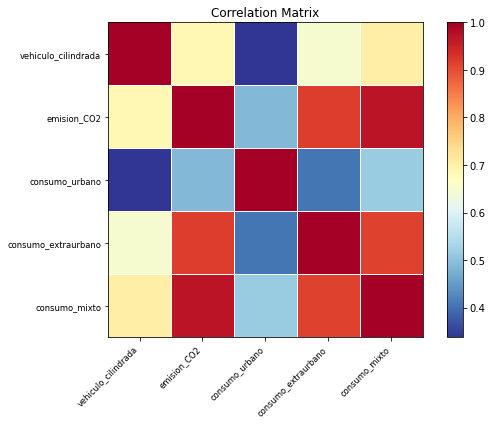

In [134]:
corr = df.set_index('vehiculo_modelo').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

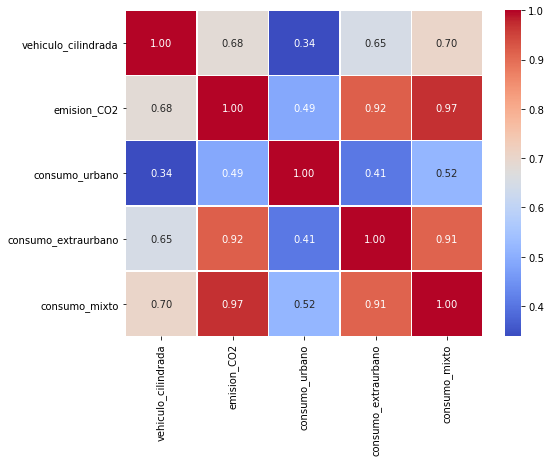

In [135]:
plt.rcParams['figure.figsize']=(8,6)
sns.heatmap(df.corr(),cmap='coolwarm',linewidths=.5,fmt=".2f",annot = True);

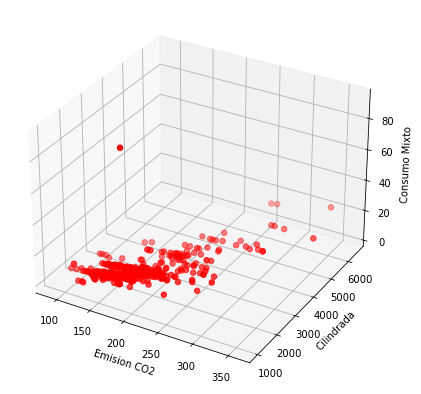

In [136]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
 
media_z = (df.emision_CO2).mean()
std_z = (df.emision_CO2).std()*2
 
for index, x in enumerate(df.emision_CO2):
    if abs(x-media_z) > std_z:
        colors = 'red'
 
ax.scatter(df.emision_CO2, df.vehiculo_cilindrada, df.consumo_urbano, s=30, c=colors,norm='Normalize')
plt.xlabel('Emision CO2')
plt.ylabel('Cilindrada')
ax.set_zlabel('Consumo Mixto')
 
plt.show()

In [137]:
#sns.pairplot(df,hue='emision_CO2');

In [138]:
#!pip install pyod  # instala la librería

In [139]:
#Trato de indentificar Outliers para eliminar y mejorar el Clustering.
# https://www.aprendemachinelearning.com/deteccion-de-outliers-en-python-anomalia/

from pyod.models.knn import KNN

X = df.filter(['vehiculo_cilindrada','emision_CO2','consumo_urbano','consumo_extraurbano','consumo_mixto'], axis=1)
#X.loc[500] = [50000, 340, 22, 20, 5]

clf = KNN(contamination=0.18)
clf.fit(X)
y_pred = clf.predict(X)
index_outliers = X[y_pred == 1]
X[y_pred == 1]

,vehiculo_cilindrada,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto
0,4461.0,260.70,11.56,8.94,9.90
6,3456.0,145.00,6.60,5.90,6.20
13,1248.0,136.64,7.46,4.97,5.89
39,1798.0,88.00,3.70,3.80,3.80
46,1560.0,99.90,4.60,3.50,3.90
57,6162.0,260.00,17.40,7.80,11.30
58,6162.0,269.00,18.10,8.10,11.70
77,999.0,126.67,6.90,4.58,5.44
80,2891.0,187.98,12.42,5.72,8.15
83,2393.0,197.00,8.90,6.60,7.50


In [140]:
vehiculos_outliers = df.loc[index_outliers.index.tolist(), :]
vehiculos_outliers 


,vehiculo_marca,vehiculo_modelo,vehiculo_tipo,vehiculo_traccion,vehiculo_id_motor,vehiculo_cilindrada,vehiculo_tipo_transmision,vehiculo_tipo_combustible,vehiculo_standard_emision,fecha_firma,ensayo_gei_numero,ensayo_gei_laboratorio,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto,id_etiqueta
0,TOYOTA,LAND CRUISER 200,SUV,4x4,TOYOTA 1VD-FTV,4461.0,AUTOMÁTICA,GAS OIL,EURO V,04/10/2017,H1860666086/241,VINÇOTTE nv,260.70,11.56,8.94,9.90,000001A
6,LEXUS,GS450H,SEDÁN 4 PUERTAS,4x2,TOYOTA 2GR-FXE,3456.0,CVT,NAFTA / ELECTRICIDAD,EURO V,31/08/2016,H16600550047/066,VINÇOTTE nv,145.00,6.60,5.90,6.20,000214B
13,HYUNDAI,GRAND i10,SEDÁN 5 PUERTAS,4x2,HYUNDAI G4LA,1248.0,MANUAL,NAFTA,EURO V,31/01/2017,KR14040131,IDIADA,136.64,7.46,4.97,5.89,000137A
39,TOYOTA,PRIUS,SEDÁN 5 PUERTAS,4x2,TOYOTA 2ZR-FXE NAFTA ELÉCTRICO,1798.0,CVT,NAFTA,EURO V,18/12/2017,JSQ326127,VCA,88.00,3.70,3.80,3.80,000003A
46,PEUGEOT,208,BERLINA 5 PUERTAS,4x2,PEUGEOT DV6DTED (9HP),1560.0,MANUAL,GAS OIL,EURO V,13/06/2016,15/06824,UTAC,99.90,4.60,3.50,3.90,000353B
57,CHEVROLET,CAMARO 6.2,SEDÁN 3 PUERTAS COUPÉ,4x2,CHEVROLET LT1 - 6.2L,6162.0,AUTOMÁTICA,NAFTA,EURO VI a,30/08/2016,LCA 53 0012 297 15,LUXCONTROL S.A.,260.00,17.40,7.80,11.30,000075A
58,CHEVROLET,CAMARO 6.2,CONVERTIBLE,4x2,CHEVROLET LT1 - 6.2L,6162.0,AUTOMÁTICA,NAFTA,EURO VI a,30/08/2016,LCA 53 0012 297 15,LUXCONTROL S.A.,269.00,18.10,8.10,11.70,000076A
77,VOLKSWAGEN,UP! - UP! TSI,SEDÁN 2 o 4 PUERTAS CON PORTÓN TRASERO,4x2,VOLKSWAGEN DNB,999.0,MANUAL,NAFTA,EURO V,27/06/2017,259/16,LABORATORIO DE VOLKSWAGEN DO BRASIL,126.67,6.90,4.58,5.44,000260B
80,ALFA ROMEO,GIULIA QUADRIFOGLIO,BERLINA,4x2,ALFA ROMEO 670050436,2891.0,AUTOMÁTICA,NAFTA,EURO VI b,19/07/2017,G0415/2/BO,CENTRO PROVA AUTOVEICOLI BOLOGNA,187.98,12.42,5.72,8.15,000196B
83,TOYOTA,HILUX,PICK UP CABINA SIMPLE DOBLE,4x2 - 4x4,TOYOTA 2GD-FTV,2393.0,MANUAL,GAS OIL,EURO V,03/08/2017,JST407442,VCA,197.00,8.90,6.60,7.50,000072A


In [141]:
vehiculos_outliers.shape

(47, 17)

In [142]:
X.shape

(398, 5)

In [143]:
vehiculos_analisis = df.drop(index_outliers.index.tolist(), axis=0)

In [144]:
vehiculos_analisis.shape

(351, 17)

In [145]:
vehiculo_combustible_df = vehiculos_analisis.filter(['vehiculo_tipo_combustible','vehiculo_cilindrada','emision_CO2','consumo_urbano','consumo_extraurbano','consumo_mixto'], axis=1)
vehiculo_combustible_df.dtypes

vehiculo_tipo_combustible     object
vehiculo_cilindrada          float64
emision_CO2                  float64
consumo_urbano               float64
consumo_extraurbano          float64
consumo_mixto                float64
dtype: object

/home/ignacio/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


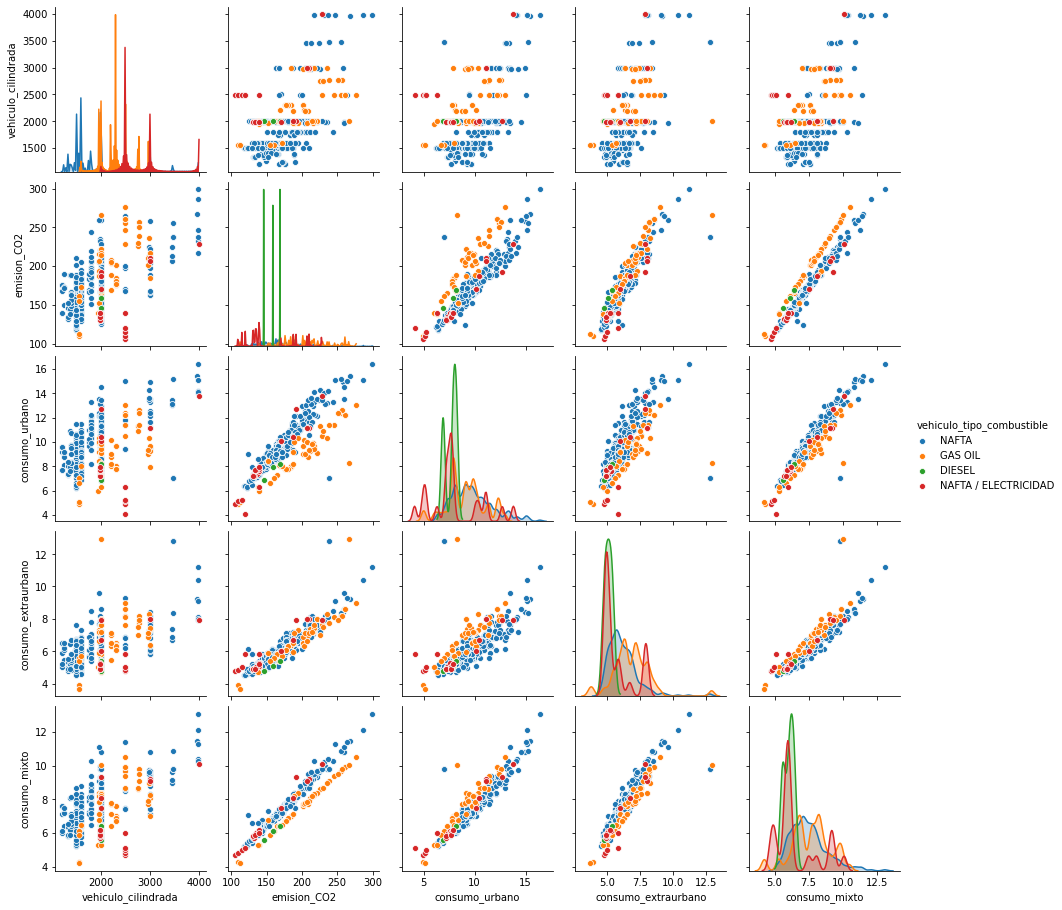

In [146]:
sns.pairplot(vehiculo_combustible_df, hue='vehiculo_tipo_combustible', diag_kws={'bw': 0.2});

In [147]:
#vehiculo_tipo_df = df.filter(['vehiculo_tipo','vehiculo_cilindrada','emision_CO2','consumo_urbano','consumo_extraurbano','consumo_mixto'], axis=1)
#sns.pairplot(vehiculo_tipo_df, hue='vehiculo_tipo', diag_kws={'bw': 0.2});

In [148]:
vehiculos_analisis.vehiculo_tipo.value_counts()

SEDÁN 4 PUERTAS                                                                37
SEDÁN 5 PUERTAS                                                                29
SUV                                                                            25
RURAL                                                                          25
BERLINA                                                                        15
                                                                               ..
TODO TERRENO                                                                    1
SEDÁN 4 PUERTAS CON PORTÓN TRASERO HB / SEDÁN 4 PUERTSA CON BAÚL TRASERO NB     1
FURGONETA                                                                       1
FAMILIAR RURAL                                                                  1
HATCH 5 PUERTAS SEDÁN 5 PUERTAS                                                 1
Name: vehiculo_tipo, Length: 93, dtype: int64

In [149]:
vehiculos_analisis.vehiculo_tipo.unique()

array(['SEDÁN 4 PUERTAS', 'COUPÉ 3 + 2 PUERTAS', 'BERLINA 3 PUERTAS',
       'BERLINA 5 PUERTAS', 'SUV', 'HATCH 5 PUERTAS SEDÁN 5 PUERTAS',
       'BERLINA 4 PUERTAS', 'CHASIS LARGO / CHASIS EXTRA LARGO',
       'SEDÁN 5 PUERTAS', 'CAMIONETA 4 PUERTAS',
       'FURGÓN / CHASIS CON CABINA', 'CAMIÓN', 'RURAL 5 PUERTAS 2WD',
       'RURAL 5 PUERTAS 4WD', 'FURGONETA', 'TODO TERRENO',
       'SEDÁN 3/5 PUERTAS', '5 PUERTAS HB', 'BERLINA 3 PUERTAS CABRIOLET',
       'SEEDÁN 4 PUERTAS', 'SEDÁN 5 PUERTAS / COUPÉ', 'CONVERTIBLE',
       'SEDÁN 3 PUERTAS / 5 PUERTAS / COUPÉ', 'BERLINA',
       'RURAL 5 PUERTAS', 'HATCHBACK', 'RURAL', 'MICROOMNIBUS',
       'PICK UP CABINA DOBLE', 'FAMILIAR-FURGÓN', 'PICK UP', 'SEDÁN',
       'PICK UP CABINA SIMPLE - CABINA DOBLE', 'MINIBUS - FURGÓN',
       'MONOVOLÚMEN 4 PUERTAS Y PORTÓN TRASERO',
       'MOMOVOLÚMEN 4PUERTAS Y PORTÓN TRASERO (5 / 7 ASIENTOS)',
       'MONOVOLÚMEN 4 PUERTAS Y PORTÓN TRASERO (5 / 7 ASIENTOS)',
       'MOMOVOLÚMEN 4PUERTAS Y PORT

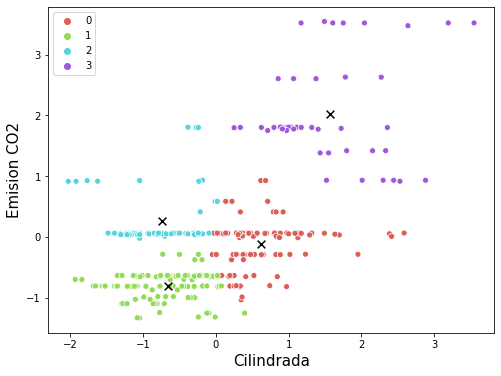

In [155]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X=vehiculos_analisis[['emision_CO2','vehiculo_cilindrada']]

scaler=StandardScaler()

X_scaled=scaler.fit_transform(X);

kmeans=KMeans(n_clusters=4,n_init=10,random_state=0) # Numero de repeticiones=10
kmeans.fit(X_scaled)

labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=X_scaled[:,0],y=X_scaled[:,1],hue=labels,legend='full',palette=sns.color_palette("hls", 4));
plt.xlabel('Cilindrada',fontsize=15);plt.ylabel('Emision CO2',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=60,color='k');

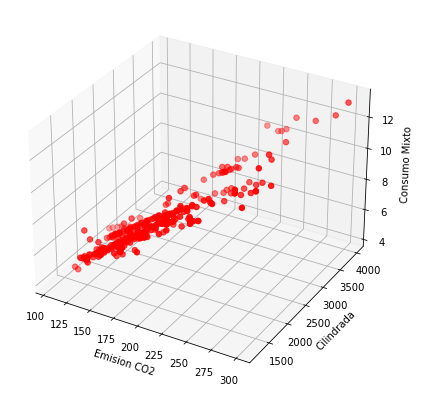

In [152]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
 
media_z = (vehiculos_analisis.emision_CO2).mean()
std_z = (vehiculos_analisis.emision_CO2).std()*2
 
for index, x in enumerate(vehiculos_analisis.emision_CO2):
    if abs(x-media_z) > std_z:
        colors = 'red'
 
ax.scatter(vehiculos_analisis.emision_CO2, vehiculos_analisis.vehiculo_cilindrada,vehiculos_analisis.consumo_mixto, s=30, c=colors,norm='Normalize')
plt.xlabel('Emision CO2')
plt.ylabel('Cilindrada')
ax.set_zlabel('Consumo Mixto')
 
plt.show()